# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

print('numpy', np.__version__)
print('pandas', pd.__version__)
print('matplotlib', matplotlib.__version__)
print('seaborn', sns.__version__)

numpy 1.15.4
pandas 0.24.1
matplotlib 3.0.2
seaborn 0.9.0


# Importing the dataset

In [2]:
def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_62d16fde9ee64a49b809102844695402 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XSCASHjDajDxaWQPvUeAapDDHRz6wRS_Hd2vgjN-IDMf',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_62d16fde9ee64a49b809102844695402.get_object(Bucket='predictingtheenergyoutputofwindtu-donotdelete-pr-4zv0a0xlcw57fc',Key='Dataset.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset = pd.read_excel(body)
dataset.head()

Date/Time  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
0 2018-01-01 00:00:00          5.311336                     416.328908   
1 2018-01-01 00:10:00          5.672167                     519.917511   
2 2018-01-01 00:20:00          5.216037                     390.900016   
3 2018-01-01 00:30:00          5.659674                     516.127569   
4 2018-01-01 00:40:00          5.577941                     491.702972   

   Wind Direction  maxtempC  windGustKmph  DewPointC  windChillC   humidity  \
0      259.994904        10        11.125   2.208333    6.333333  69.916667   
1      268.641113        10        11.125   2.208333    6.333333  69.916667   
2      272.564789        10        11.125   2.208333    6.333333  69.916667   
3      271.258087        10        11.125   2.208333    6.333333  69.916667   
4      265.674286        10        11.125   2.208333    6.333333  69.916667   

   pressure  LV ActivePower  
0  1017.625      380.047791  
1  1017.625      453.769196  
2  1017.625      306.376587  
3  1017.625      419.645905  
4  1017.625      380.650696

In [3]:
# Separating Date and Time
dataset['Date/Time'] = pd.to_datetime(dataset['Date/Time'],format='%d %m %Y %H:%M')
dataset['Hour'] = dataset['Date/Time'].dt.hour
dataset['Minute'] = dataset['Date/Time'].dt.minute
dataset['Day'] = dataset['Date/Time'].dt.day
dataset['Month'] = dataset['Date/Time'].dt.month
dataset['Year'] = dataset['Date/Time'].dt.year
dataset = dataset.reindex(columns = ['Date/Time', 'Minute', 'Hour', 'Day', 'Month', 'Year', 'Wind Speed (m/s)' ,'Theoretical_Power_Curve (KWh)',
                                     'Wind Direction', 'maxtempC', 'windGustKmph', 'DewPointC', 'windChillC', 'humidity', 'pressure',
                                     'LV ActivePower'])
dataset.head()

Date/Time  Minute  Hour  Day  Month  Year  Wind Speed (m/s)  \
0 2018-01-01 00:00:00       0     0    1      1  2018          5.311336   
1 2018-01-01 00:10:00      10     0    1      1  2018          5.672167   
2 2018-01-01 00:20:00      20     0    1      1  2018          5.216037   
3 2018-01-01 00:30:00      30     0    1      1  2018          5.659674   
4 2018-01-01 00:40:00      40     0    1      1  2018          5.577941   

   Theoretical_Power_Curve (KWh)  Wind Direction  maxtempC  windGustKmph  \
0                     416.328908      259.994904        10        11.125   
1                     519.917511      268.641113        10        11.125   
2                     390.900016      272.564789        10        11.125   
3                     516.127569      271.258087        10        11.125   
4                     491.702972      265.674286        10        11.125   

   DewPointC  windChillC   humidity  pressure  LV ActivePower  
0   2.208333    6.333333  69.916667  1017.625      380.047791  
1   2.208333    6.333333  69.916667  1017.625      453.769196  
2   2.208333    6.333333  69.916667  1017.625      306.376587  
3   2.208333    6.333333  69.916667  1017.625      419.645905  
4   2.208333    6.333333  69.916667  1017.625      380.650696

# Dataset Info

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 16 columns):
Date/Time                        50530 non-null datetime64[ns]
Minute                           50530 non-null int64
Hour                             50530 non-null int64
Day                              50530 non-null int64
Month                            50530 non-null int64
Year                             50530 non-null int64
Wind Speed (m/s)                 50530 non-null float64
Theoretical_Power_Curve (KWh)    50530 non-null float64
Wind Direction                   50530 non-null float64
maxtempC                         50530 non-null int64
windGustKmph                     50530 non-null float64
DewPointC                        50530 non-null float64
windChillC                       50530 non-null float64
humidity                         50530 non-null float64
pressure                         50530 non-null float64
LV ActivePower                   50530 non-null float64


In [5]:
dataset.describe()

Minute          Hour           Day         Month     Year  \
count  50530.000000  50530.000000  50530.000000  50530.000000  50530.0   
mean      24.997625     11.517356     15.626756      6.507956   2018.0   
std       17.077802      6.934626      8.692104      3.409312      0.0   
min        0.000000      0.000000      1.000000      1.000000   2018.0   
25%       10.000000      5.000000      8.000000      4.000000   2018.0   
50%       20.000000     12.000000     16.000000      6.000000   2018.0   
75%       40.000000     18.000000     23.000000      9.000000   2018.0   
max       50.000000     23.000000     31.000000     12.000000   2018.0   

       Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  Wind Direction  \
count      50530.000000                   50530.000000    50530.000000   
mean           7.557952                    1492.175463      123.687559   
std            4.227166                    1368.018238       93.443736   
min            0.000000                       0.000000        0.000000   
25%            4.201395                     161.328167       49.315437   
50%            7.104594                    1063.776283       73.712978   
75%           10.300020                    2964.972462      201.696720   
max           25.206011                    3600.000000      359.997589   

           maxtempC  windGustKmph     DewPointC    windChillC      humidity  \
count  50530.000000  50530.000000  50530.000000  50530.000000  50530.000000   
mean      19.067861     15.707075     10.533829     15.214307     72.230347   
std        7.625029      6.333129      5.865437      7.757878     10.148425   
min        3.000000      4.291667     -3.458333     -3.833333     43.416667   
25%       13.000000     10.958333      5.583333      8.500000     64.916667   
50%       19.000000     14.833333     10.791667     16.250000     72.458333   
75%       26.000000     18.791667     15.500000     22.291667     81.166667   
max       32.000000     38.416667     20.666667     27.500000     93.958333   

           pressure  LV ActivePower  
count  50530.000000    50530.000000  
mean    1014.958328     1307.684332  
std        5.907567     1312.459242  
min      999.083333       -2.471405  
25%     1011.000000       50.677890  
50%     1014.625000      825.838074  
75%     1019.541667     2482.507568  
max     1031.500000     3618.732910

# Dataset Visualization

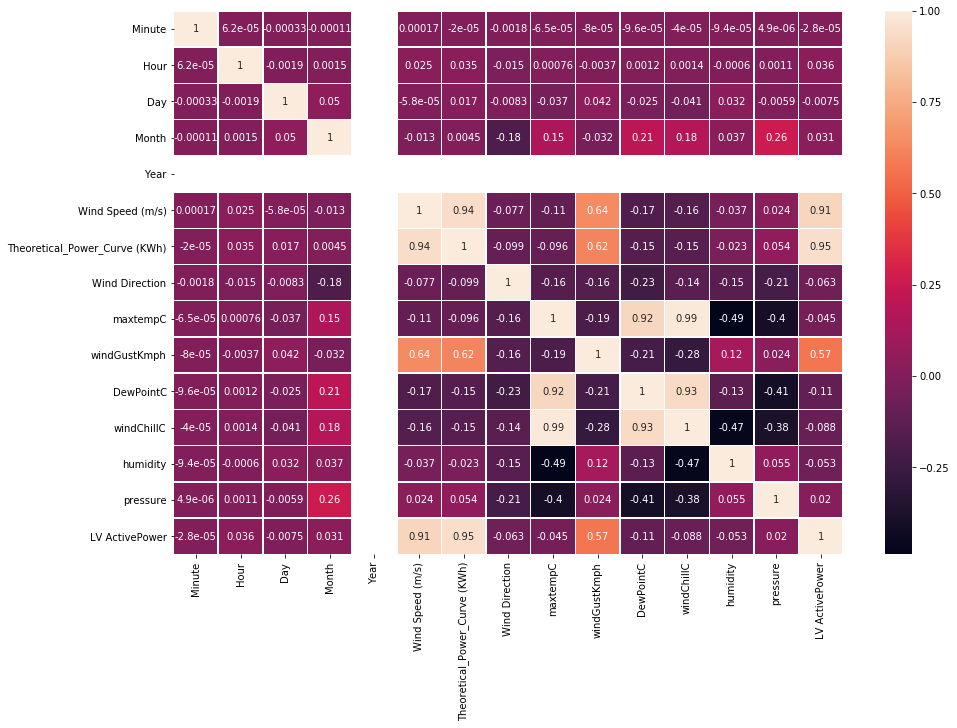

In [6]:
# plot corelation
import seaborn as sns
import matplotlib.pyplot as plt
ig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True, linewidths=.5, ax=ax)

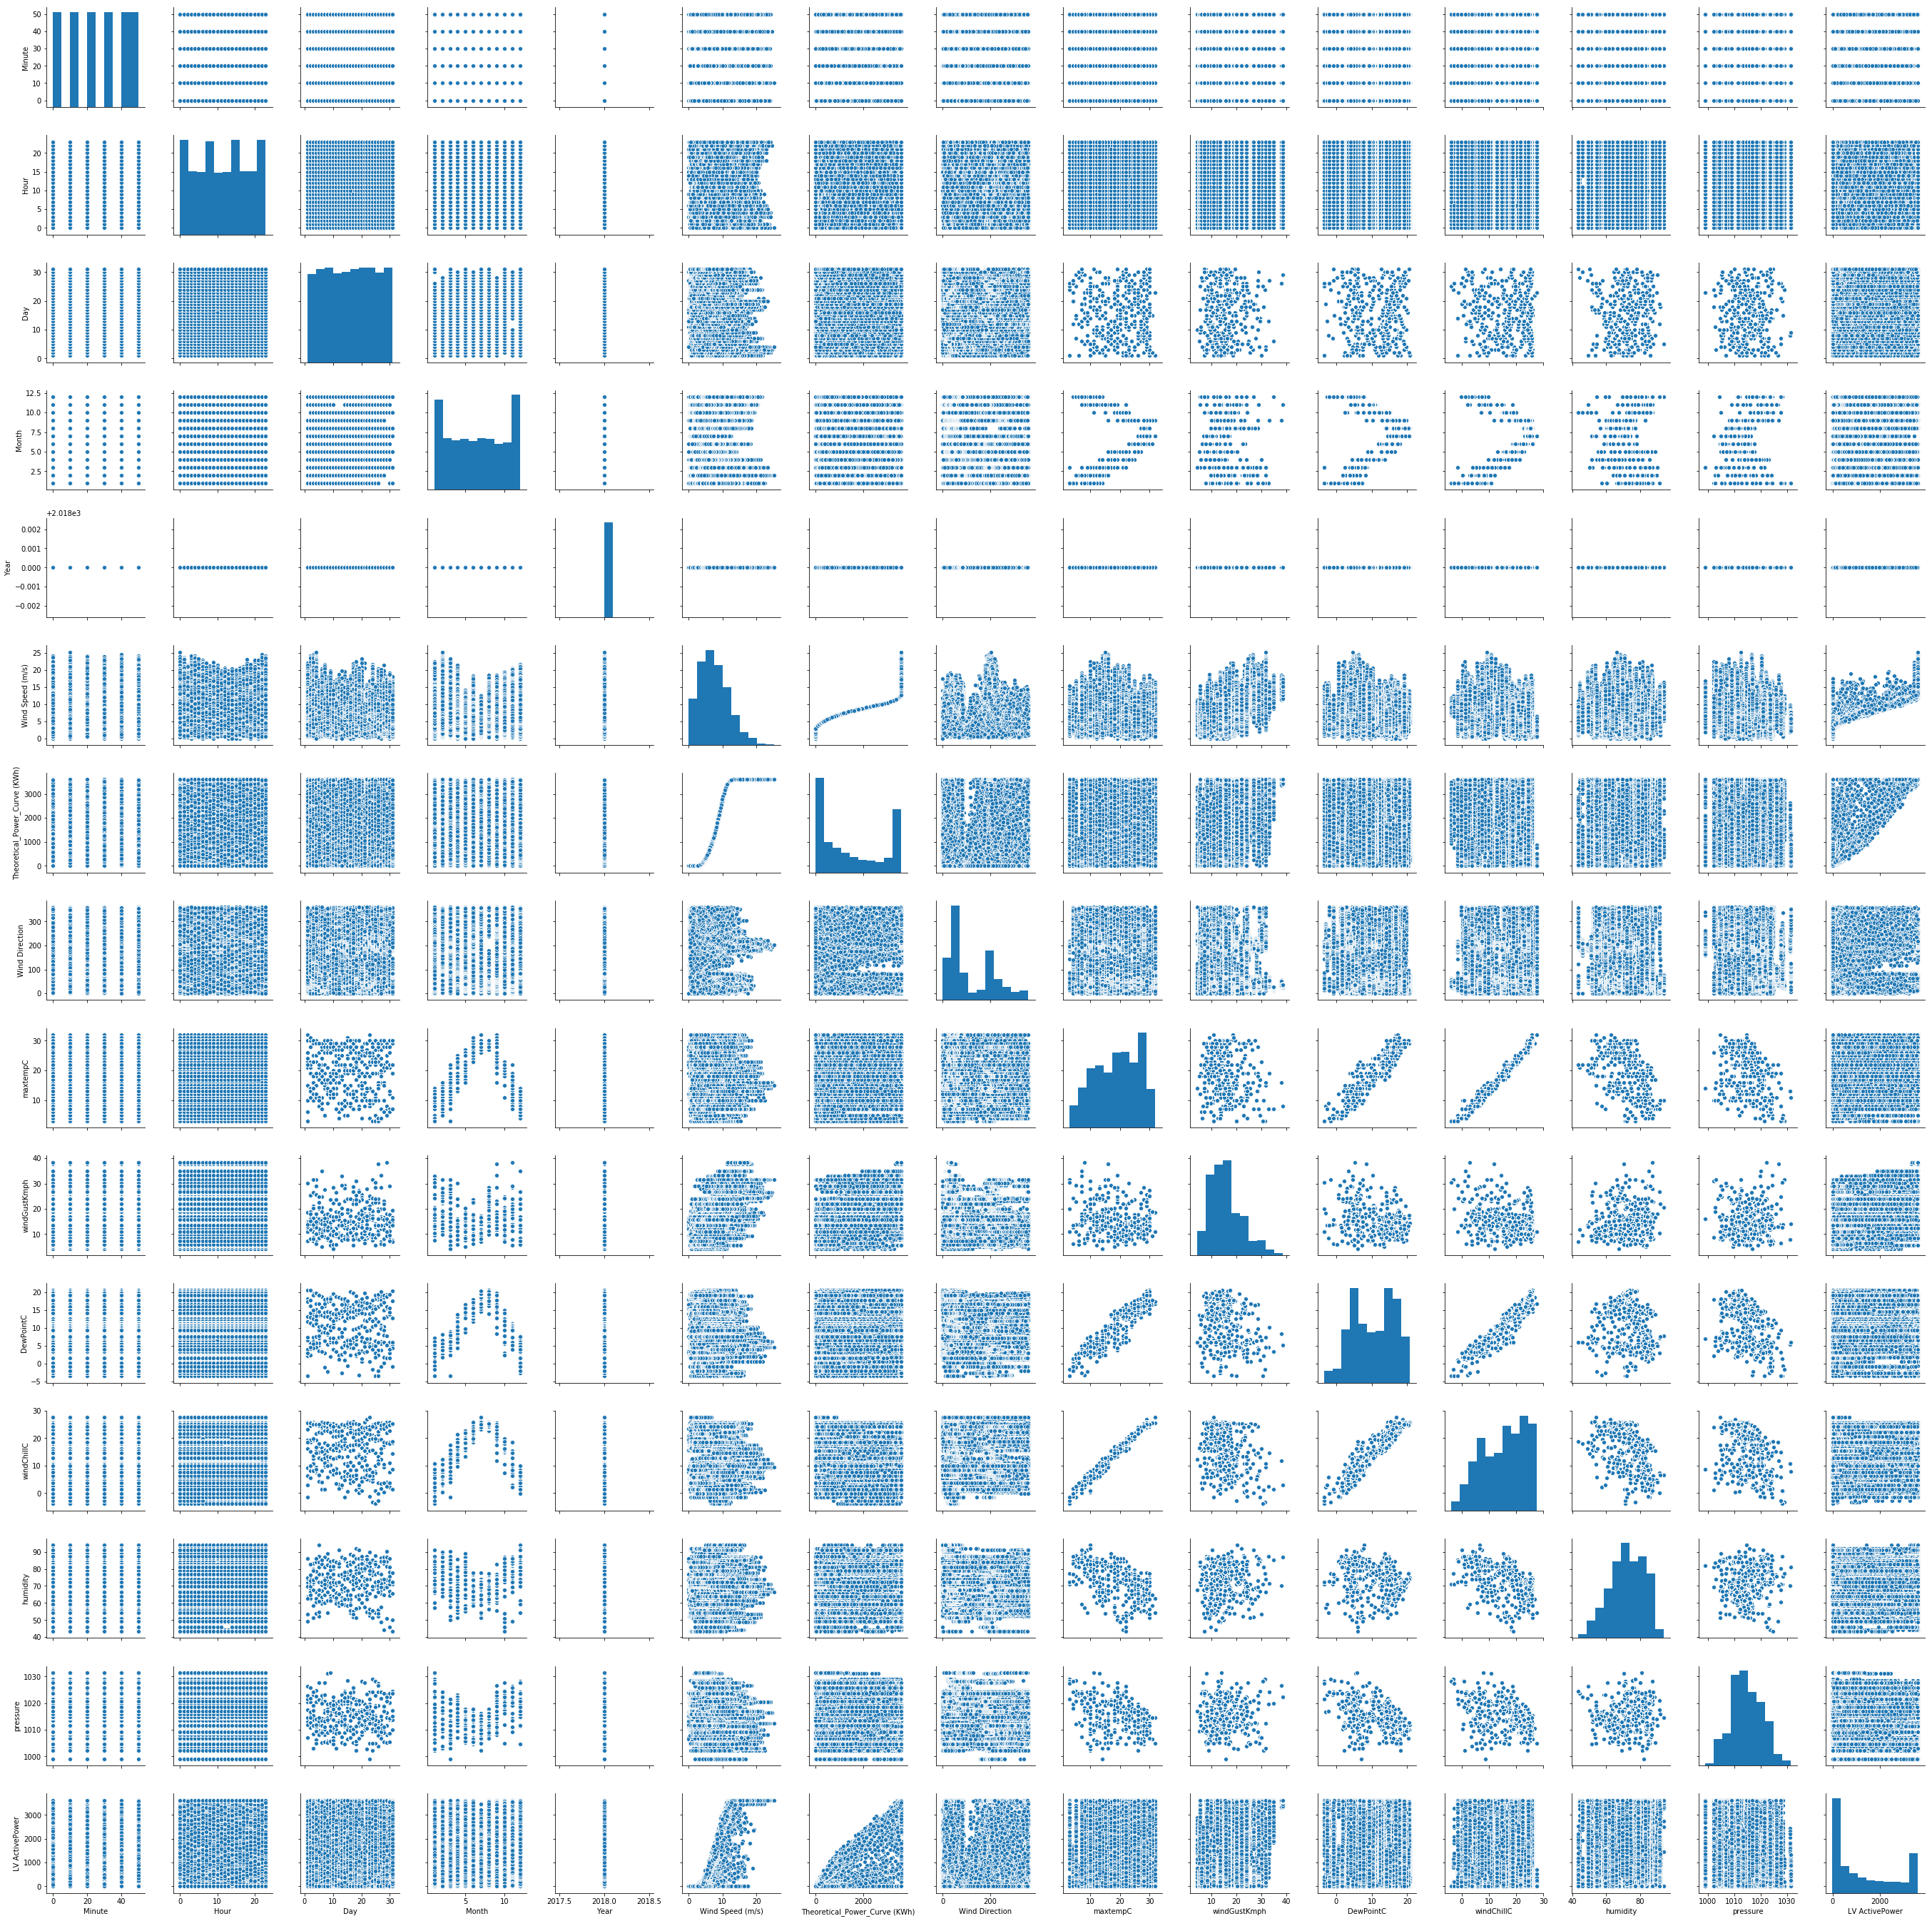

In [7]:
# pairplot
sns.pairplot(dataset)
plt.show()

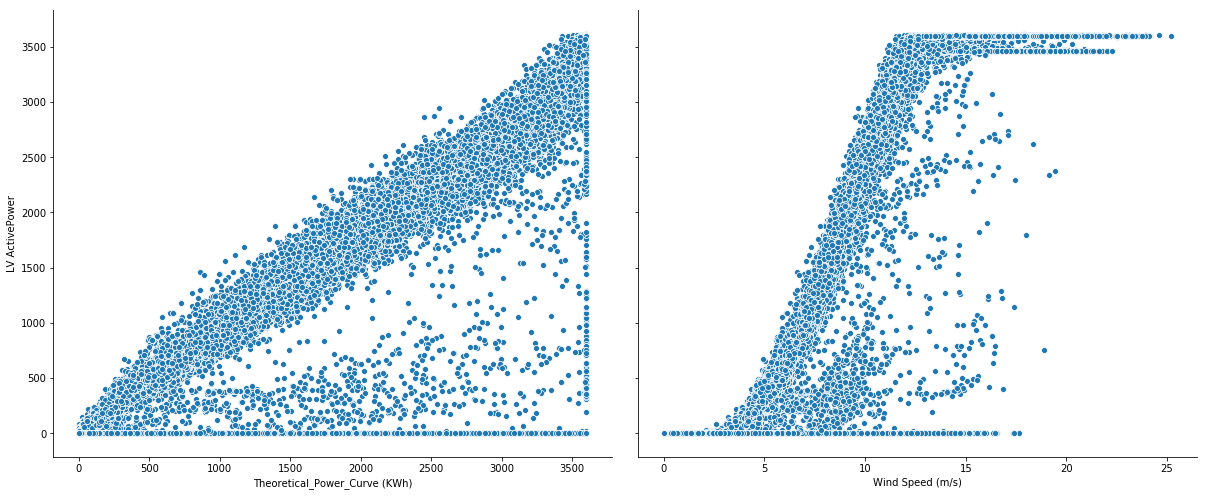

In [8]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['Theoretical_Power_Curve (KWh)', 'Wind Speed (m/s)'],
             y_vars='LV ActivePower', height=7, aspect=1.2)

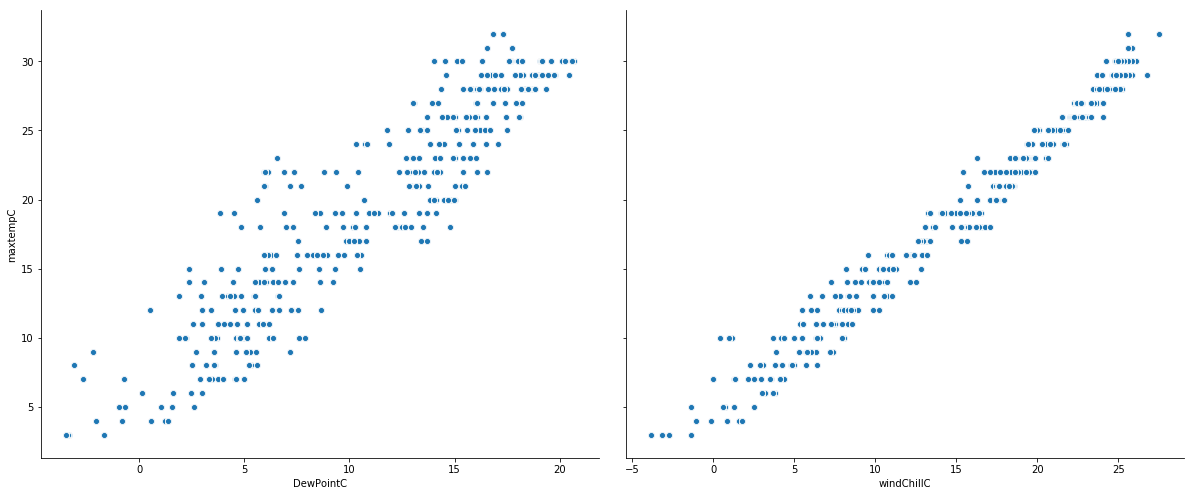

In [9]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['DewPointC', 'windChillC'],
             y_vars='maxtempC', height=7, aspect=1.2)

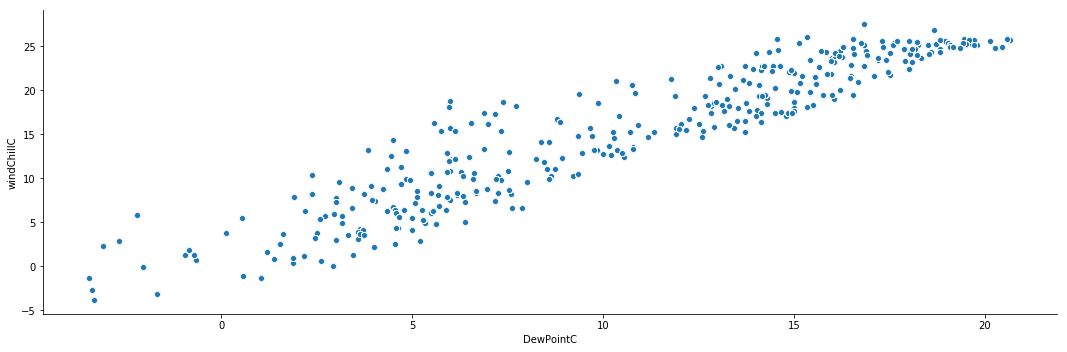

In [10]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['DewPointC'], y_vars='windChillC', height=5, aspect=3)

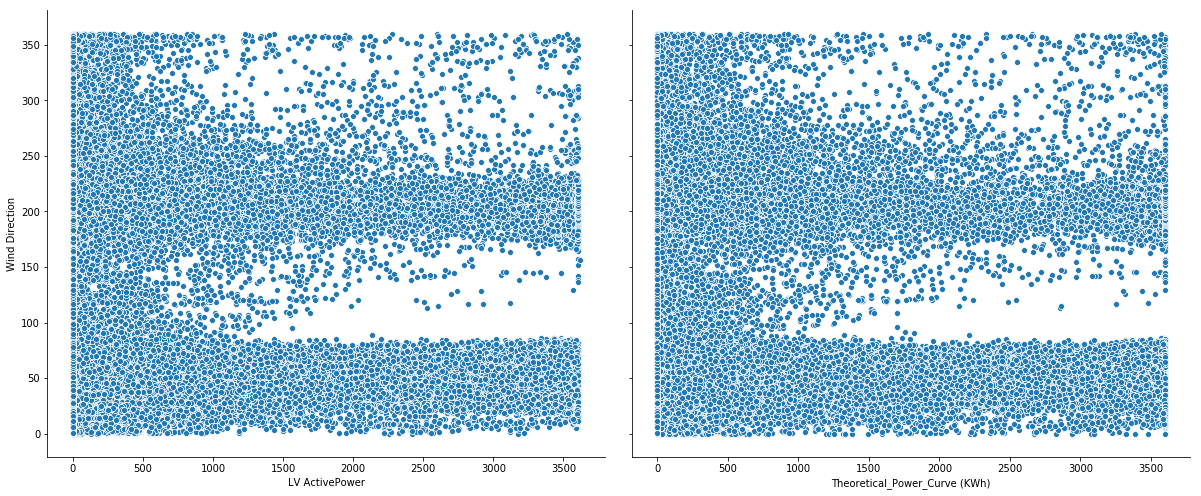

In [11]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(dataset, x_vars=['LV ActivePower', 'Theoretical_Power_Curve (KWh)'], y_vars='Wind Direction',
             height=7, aspect=1.2)

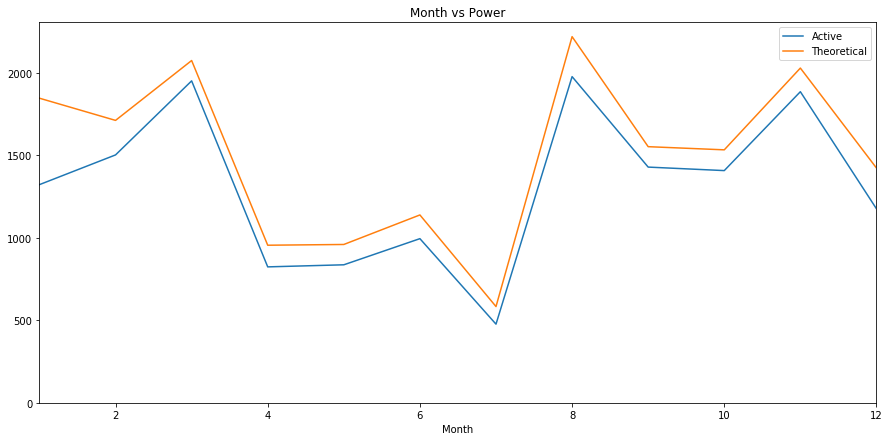

In [12]:
# LV ActivePower v/s Theoretical_Power_Curve (KWh)
plt.figure(figsize = (15,7))
dataset.groupby('Month')['LV ActivePower'].mean().plot(label = 'Active')
dataset.groupby('Month')['Theoretical_Power_Curve (KWh)'].mean().plot(label = 'Theoretical')
plt.ylim(0)
plt.legend()
plt.title("Month vs Power")
plt.show()

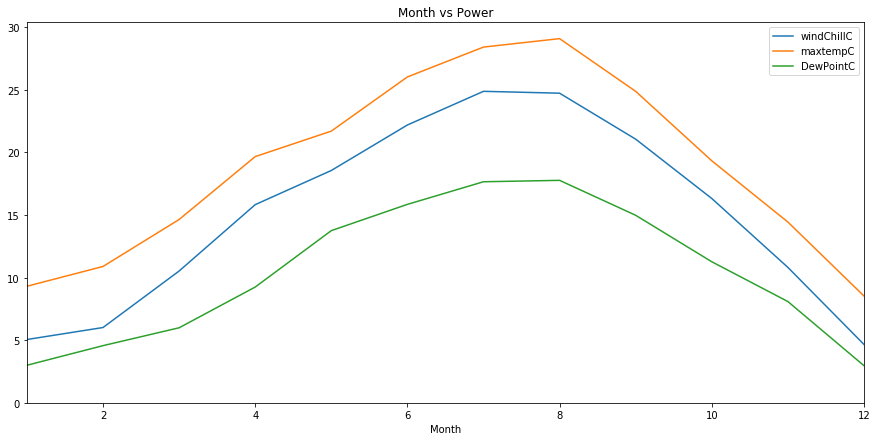

In [13]:
# windChillc v/s maxtempc v/s DewPointC
plt.figure(figsize = (15,7))
dataset.groupby('Month')['windChillC'].mean().plot(label = 'windChillC')
dataset.groupby('Month')['maxtempC'].mean().plot(label = 'maxtempC')
dataset.groupby('Month')['DewPointC'].mean().plot(label = 'DewPointC')
plt.ylim(0)
plt.legend()
plt.title("Month vs Power")
plt.show()